In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
# import plotly.express as px
# import plotly.graph_objects as go

#Data Preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
# from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [2]:
data = pd.read_csv('bank_data.csv')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
# There is not NaN or null values in columns
data.shape


(6819, 96)

In [5]:
df.groupby('Category').Message.count().plot.bar(ylim = 0)

plt.show()

NameError: name 'df' is not defined

In [4]:
# data.describe()
print(len(data[data['Bankrupt?'] == 1]))
print(len(data[data['Bankrupt?'] == 0]))


220
6599


In [5]:
X = data.drop('Bankrupt?', axis = 1)
Y = data['Bankrupt?']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)


In [7]:
# pca = PCA(n_components=0.95)  # Retain 95% of variance
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)

In [8]:
def impressions(model,accuracy):
    print('Accuracy: {} %'.format(accuracy))
    # print('Mean squared error: ', round(mean_squared_error(Y_test,Y_pred),3))
    cm=confusion_matrix(Y_test,Y_pred)
    class_label = [0, 1]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()



In [10]:
from sklearn.linear_model import LogisticRegression

regression = LogisticRegression()
regression.fit(X_train,Y_train)




C:\Users\nisch\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 96.188 %


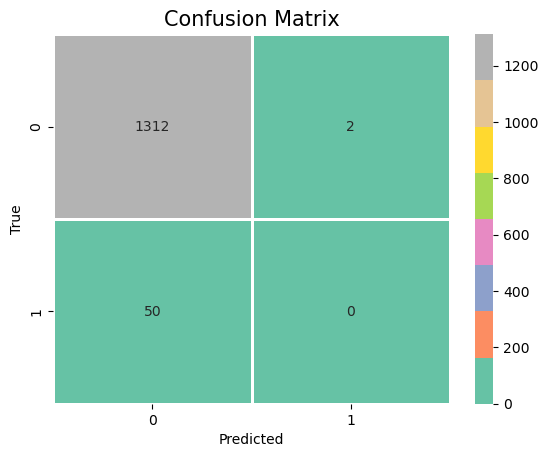

In [11]:
Y_pred= regression.predict(X_test)

reg_accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # Accuracy

impressions(regression,reg_accuracy)